In [98]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
# IMPORT DESIRED INTERACTION CLASS AND CONFIGURATION
import sys
import os
import numpy as np
from itertools import product
from copy import deepcopy
import pickle

# Get the parent directory (where `configs/` and `interactions/` are located)
parent_dir = os.path.abspath(os.path.join(os.getcwd(), ".."))

# Add it to sys.path
sys.path.append(parent_dir)
from configs.config_class import Config

# Now you should be able to import
from interactions import ppo_interaction as ppo
# from configs.interaction_configs.ppo_interaction_configs import ppo_interaction_config
# from configs.interaction_configs.ppo_interaction_configs import ppo_interaction_texasholdem_config
# from configs.ppo_configs import ppo_interaction_config_texas, texas_holdem_config, actor_configs_texas, critic_configs_texas
from configs.ppo_configs_dict import ppo_interaction_config_texas, texas_holdem_config, actor_configs_texas, critic_configs_texas
from configs.llm_configs import texas_holdem_llm_agent_configs
# from configs.agent_configs.a_ppo_agents import actor_configs, critic_configs

base_cfg = ppo_interaction_config_texas
base_actor = actor_configs_texas
base_critic = critic_configs_texas

param_dict_cfg = {
"c" : [0.05, 0.15, 0.3],
"batch_size" : [64, 128, 256],
"num_epochs" : [4,6,8],
"update_frequency" : [1000,4000,7000],
}

param_dict_actor = {
	"learning_rate_actor" : [3e-5, 3e-4, 1e-3],
	"hidden_layer" : [[256, 256], [128,128]],
}

param_dict_critic = {
	"learning_rate_critic" : [3e-5, 3e-4, 1e-3],
	"hidden_layer" : [[256, 256], [128,128]],
}

train_scores_total = {}
test_scores_total = {}

def update_scores(param, value, train_score, test_score):
    train_scores_total[f"{param}:{str(value)}"] = train_score
    test_scores_total[f"{param}:{str(value)}"] = test_score


for param in param_dict_cfg:
	for value in param_dict_cfg[param]:
		print(f"Now training: {param}, {value}")
		cfg = deepcopy(base_cfg)
		cfg[param] = value
		print(Config(cfg))
		ppo_temp = ppo.PPO_interaction(interaction_configs=Config(cfg),
													env_configs=Config(texas_holdem_config),
													actor_configs=Config(actor_configs_texas),
													critic_configs=Config(critic_configs_texas),
                      llm_configs=texas_holdem_llm_agent_configs)
		train_scores, trained_agents = ppo_temp.train_multiagent()
		test_scores = ppo_temp.test_multiagent(trained_agents)
		update_scores(param, value, train_scores, test_scores)

for param in param_dict_actor:
	for value in param_dict_actor[param]:
		print(f"Now training: {param}, {value}")
		cfg = deepcopy(actor_configs_texas)
		cfg[param] = value
		print(Config(cfg))
		ppo_temp = ppo.PPO_interaction(interaction_configs=Config(ppo_interaction_config_texas),
													env_configs=Config(texas_holdem_config),
													actor_configs=Config(cfg),
													critic_configs=Config(critic_configs_texas),
                      llm_configs=texas_holdem_llm_agent_configs)
		train_scores, trained_agents = ppo_temp.train_multiagent()
		test_scores = ppo_temp.test_multiagent(trained_agents)
		update_scores(param, value, train_scores, test_scores)

for param in param_dict_critic:
	for value in param_dict_critic[param]:
		print(f"Now training: {param}, {value}")
		cfg = deepcopy(critic_configs_texas)
		cfg[param] = value
		print(Config(cfg))
		ppo_temp = ppo.PPO_interaction(interaction_configs=Config(ppo_interaction_config_texas),
													env_configs=Config(texas_holdem_config),
													actor_configs=Config(actor_configs_texas),
													critic_configs=Config(cfg),
                      llm_configs=texas_holdem_llm_agent_configs)
		train_scores, trained_agents = ppo_temp.train_multiagent()
		test_scores = ppo_temp.test_multiagent(trained_agents)
		update_scores(param, value, train_scores, test_scores)


print(train_scores_total)
print(test_scores_total)

with open("train_scores5.pkl", "wb") as f:       # save
    pickle.dump(train_scores_total, f, protocol=pickle.HIGHEST_PROTOCOL)

with open("test_scores5.pkl", "wb") as f:       # save
    pickle.dump(test_scores_total, f, protocol=pickle.HIGHEST_PROTOCOL)

Now training: c, 0.05
🖥  Using device: cpu
self obs size: 76


  3%|▎         | 1752/70000 [00:01<00:45, 1509.13it/s]

[PPO UPDATE] avg_actor_loss=0.0696, avg_critic_loss=4.7063


  5%|▍         | 3166/70000 [00:01<00:49, 1343.31it/s]

[PPO UPDATE] avg_actor_loss=0.0437, avg_critic_loss=4.5135


  7%|▋         | 4623/70000 [00:02<00:46, 1409.68it/s]

[PPO UPDATE] avg_actor_loss=0.0291, avg_critic_loss=4.2513


  9%|▊         | 6067/70000 [00:03<00:44, 1442.49it/s]

[PPO UPDATE] avg_actor_loss=0.0279, avg_critic_loss=4.1079


 11%|█         | 7725/70000 [00:04<00:39, 1557.16it/s]

[PPO UPDATE] avg_actor_loss=0.0234, avg_critic_loss=5.9824


 13%|█▎        | 9081/70000 [00:05<00:40, 1504.63it/s]

[PPO UPDATE] avg_actor_loss=0.0209, avg_critic_loss=4.2136


 15%|█▌        | 10625/70000 [00:06<00:39, 1487.11it/s]

[PPO UPDATE] avg_actor_loss=0.0219, avg_critic_loss=4.6348


 16%|█▌        | 10955/70000 [00:06<00:35, 1661.34it/s]


KeyboardInterrupt: 

In [ ]:

base_cfg = ppo_interaction_config_texas
base_actor = actor_configs_texas
base_critic = critic_configs_texas

param_dict_cfg = {
"c" : [0.05, 0.15, 0.3],
"batch_size" : [64, 128, 256],
"num_epochs" : [4,6,8],
"update_frequency" : [1000,4000,7000],
}

param_dict_actor = {
	"learning_rate_actor" : [3e-5, 3e-4, 1e-3],
	"hidden_layer" : [[256, 256], [128,128]],
}

param_dict_critic = {
	"learning_rate_critic" : [3e-5, 3e-4, 1e-3],
	"hidden_layer" : [[256, 256], [128,128]],
}

train_scores_total = {}
test_scores_total = {}

def update_scores(param, value, train_score, test_score):
    train_scores_total[f"{param}:{str(value)}"] = train_score
    test_scores_total[f"{param}:{str(value)}"] = test_score


for param in param_dict_cfg:
	for value in param_dict_cfg[param]:
		print(f"Now training: {param}, {value}")
		cfg = deepcopy(base_cfg)
		cfg[param] = value
		print(Config(cfg))
		ppo_temp = ppo.PPO_interaction(interaction_configs=Config(cfg),
													env_configs=Config(texas_holdem_config),
													actor_configs=Config(actor_configs_texas),
													critic_configs=Config(critic_configs_texas),
                      llm_configs=texas_holdem_llm_agent_configs)
		train_scores, trained_agents = ppo_temp.train_multiagent()
		test_scores = ppo_temp.test_multiagent(trained_agents)
		update_scores(param, value, train_scores, test_scores)

for param in param_dict_actor:
	for value in param_dict_actor[param]:
		print(f"Now training: {param}, {value}")
		cfg = deepcopy(actor_configs_texas)
		cfg[param] = value
		print(Config(cfg))
		ppo_temp = ppo.PPO_interaction(interaction_configs=Config(ppo_interaction_config_texas),
													env_configs=Config(texas_holdem_config),
													actor_configs=Config(cfg),
													critic_configs=Config(critic_configs_texas),
                      llm_configs=texas_holdem_llm_agent_configs)
		train_scores, trained_agents = ppo_temp.train_multiagent()
		test_scores = ppo_temp.test_multiagent(trained_agents)
		update_scores(param, value, train_scores, test_scores)


for param in param_dict_critic:
	for value in param_dict_critic[param]:
		print(f"Now training: {param}, {value}")
		cfg = deepcopy(critic_configs_texas)
		cfg[param] = value
		print(Config(cfg))
		ppo_temp = ppo.PPO_interaction(interaction_configs=Config(ppo_interaction_config_texas),
													env_configs=Config(texas_holdem_config),
													actor_configs=Config(actor_configs_texas),
													critic_configs=Config(cfg),
                      llm_configs=texas_holdem_llm_agent_configs)
		train_scores, trained_agents = ppo_temp.train_multiagent()
		test_scores = ppo_temp.test_multiagent(trained_agents)
		update_scores(param, value, train_scores, test_scores)


print(train_scores_total)
print(test_scores_total)

with open("train_scores6.pkl", "wb") as f:       # save
    pickle.dump(train_scores_total, f, protocol=pickle.HIGHEST_PROTOCOL)

with open("test_scores6.pkl", "wb") as f:       # save
    pickle.dump(test_scores_total, f, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:

base_cfg = ppo_interaction_config_texas
base_actor = actor_configs_texas
base_critic = critic_configs_texas

param_dict_cfg = {
"c" : [0.05, 0.15, 0.3],
"batch_size" : [64, 128, 256],
"num_epochs" : [4,6,8],
"update_frequency" : [1000,4000,7000],
}

param_dict_actor = {
	"learning_rate_actor" : [3e-5, 3e-4, 1e-3],
	"hidden_layer" : [[256, 256], [128,128]],
}

param_dict_critic = {
	"learning_rate_critic" : [3e-5, 3e-4, 1e-3],
	"hidden_layer" : [[256, 256], [128,128]],
}

train_scores_total = {}
test_scores_total = {}

def update_scores(param, value, train_score, test_score):
    train_scores_total[f"{param}:{str(value)}"] = train_score
    test_scores_total[f"{param}:{str(value)}"] = test_score


for param in param_dict_cfg:
	for value in param_dict_cfg[param]:
		print(f"Now training: {param}, {value}")
		cfg = deepcopy(base_cfg)
		cfg[param] = value
		print(Config(cfg))
		ppo_temp = ppo.PPO_interaction(interaction_configs=Config(cfg),
													env_configs=Config(texas_holdem_config),
													actor_configs=Config(actor_configs_texas),
													critic_configs=Config(critic_configs_texas),
                      llm_configs=texas_holdem_llm_agent_configs)
		train_scores, trained_agents = ppo_temp.train_multiagent()
		test_scores = ppo_temp.test_multiagent(trained_agents)
		update_scores(param, value, train_scores, test_scores)

for param in param_dict_actor:
	for value in param_dict_actor[param]:
		print(f"Now training: {param}, {value}")
		cfg = deepcopy(actor_configs_texas)
		cfg[param] = value
		print(Config(cfg))
		ppo_temp = ppo.PPO_interaction(interaction_configs=Config(ppo_interaction_config_texas),
													env_configs=Config(texas_holdem_config),
													actor_configs=Config(cfg),
													critic_configs=Config(critic_configs_texas),
                      llm_configs=texas_holdem_llm_agent_configs)
		train_scores, trained_agents = ppo_temp.train_multiagent()
		test_scores = ppo_temp.test_multiagent(trained_agents)
		update_scores(param, value, train_scores, test_scores)


for param in param_dict_critic:
	for value in param_dict_critic[param]:
		print(f"Now training: {param}, {value}")
		cfg = deepcopy(critic_configs_texas)
		cfg[param] = value
		print(Config(cfg))
		ppo_temp = ppo.PPO_interaction(interaction_configs=Config(ppo_interaction_config_texas),
													env_configs=Config(texas_holdem_config),
													actor_configs=Config(actor_configs_texas),
													critic_configs=Config(cfg),
                      llm_configs=texas_holdem_llm_agent_configs)
		train_scores, trained_agents = ppo_temp.train_multiagent()
		test_scores = ppo_temp.test_multiagent(trained_agents)
		update_scores(param, value, train_scores, test_scores)


print(train_scores_total)
print(test_scores_total)

with open("train_scores7.pkl", "wb") as f:       # save
    pickle.dump(train_scores_total, f, protocol=pickle.HIGHEST_PROTOCOL)

with open("test_scores7.pkl", "wb") as f:       # save
    pickle.dump(test_scores_total, f, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:

base_cfg = ppo_interaction_config_texas
base_actor = actor_configs_texas
base_critic = critic_configs_texas

param_dict_cfg = {
"c" : [0.05, 0.15, 0.3],
"batch_size" : [64, 128, 256],
"num_epochs" : [4,6,8],
"update_frequency" : [1000,4000,7000],
}

param_dict_actor = {
	"learning_rate_actor" : [3e-5, 3e-4, 1e-3],
	"hidden_layer" : [[256, 256], [128,128]],
}

param_dict_critic = {
	"learning_rate_critic" : [3e-5, 3e-4, 1e-3],
	"hidden_layer" : [[256, 256], [128,128]],
}

train_scores_total = {}
test_scores_total = {}

def update_scores(param, value, train_score, test_score):
    train_scores_total[f"{param}:{str(value)}"] = train_score
    test_scores_total[f"{param}:{str(value)}"] = test_score


for param in param_dict_cfg:
	for value in param_dict_cfg[param]:
		print(f"Now training: {param}, {value}")
		cfg = deepcopy(base_cfg)
		cfg[param] = value
		print(Config(cfg))
		ppo_temp = ppo.PPO_interaction(interaction_configs=Config(cfg),
													env_configs=Config(texas_holdem_config),
													actor_configs=Config(actor_configs_texas),
													critic_configs=Config(critic_configs_texas),
                      llm_configs=texas_holdem_llm_agent_configs)
		train_scores, trained_agents = ppo_temp.train_multiagent()
		test_scores = ppo_temp.test_multiagent(trained_agents)
		update_scores(param, value, train_scores, test_scores)

for param in param_dict_actor:
	for value in param_dict_actor[param]:
		print(f"Now training: {param}, {value}")
		cfg = deepcopy(actor_configs_texas)
		cfg[param] = value
		print(Config(cfg))
		ppo_temp = ppo.PPO_interaction(interaction_configs=Config(ppo_interaction_config_texas),
													env_configs=Config(texas_holdem_config),
													actor_configs=Config(cfg),
													critic_configs=Config(critic_configs_texas),
                      llm_configs=texas_holdem_llm_agent_configs)
		train_scores, trained_agents = ppo_temp.train_multiagent()
		test_scores = ppo_temp.test_multiagent(trained_agents)
		update_scores(param, value, train_scores, test_scores)


for param in param_dict_critic:
	for value in param_dict_critic[param]:
		print(f"Now training: {param}, {value}")
		cfg = deepcopy(critic_configs_texas)
		cfg[param] = value
		print(Config(cfg))
		ppo_temp = ppo.PPO_interaction(interaction_configs=Config(ppo_interaction_config_texas),
													env_configs=Config(texas_holdem_config),
													actor_configs=Config(actor_configs_texas),
													critic_configs=Config(cfg),
                      llm_configs=texas_holdem_llm_agent_configs)
		train_scores, trained_agents = ppo_temp.train_multiagent()
		test_scores = ppo_temp.test_multiagent(trained_agents)
		update_scores(param, value, train_scores, test_scores)


print(train_scores_total)
print(test_scores_total)

with open("train_scores8.pkl", "wb") as f:       # save
    pickle.dump(train_scores_total, f, protocol=pickle.HIGHEST_PROTOCOL)

with open("test_scores8.pkl", "wb") as f:       # save
    pickle.dump(test_scores_total, f, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:

base_cfg = ppo_interaction_config_texas
base_actor = actor_configs_texas
base_critic = critic_configs_texas

param_dict_cfg = {
"c" : [0.05, 0.15, 0.3],
"batch_size" : [64, 128, 256],
"num_epochs" : [4,6,8],
"update_frequency" : [1000,4000,7000],
}

param_dict_actor = {
	"learning_rate_actor" : [3e-5, 3e-4, 1e-3],
	"hidden_layer" : [[256, 256], [128,128]],
}

param_dict_critic = {
	"learning_rate_critic" : [3e-5, 3e-4, 1e-3],
	"hidden_layer" : [[256, 256], [128,128]],
}

train_scores_total = {}
test_scores_total = {}

def update_scores(param, value, train_score, test_score):
    train_scores_total[f"{param}:{str(value)}"] = train_score
    test_scores_total[f"{param}:{str(value)}"] = test_score


for param in param_dict_cfg:
	for value in param_dict_cfg[param]:
		print(f"Now training: {param}, {value}")
		cfg = deepcopy(base_cfg)
		cfg[param] = value
		print(Config(cfg))
		ppo_temp = ppo.PPO_interaction(interaction_configs=Config(cfg),
													env_configs=Config(texas_holdem_config),
													actor_configs=Config(actor_configs_texas),
													critic_configs=Config(critic_configs_texas),
                      llm_configs=texas_holdem_llm_agent_configs)
		train_scores, trained_agents = ppo_temp.train_multiagent()
		test_scores = ppo_temp.test_multiagent(trained_agents)
		update_scores(param, value, train_scores, test_scores)

for param in param_dict_actor:
	for value in param_dict_actor[param]:
		print(f"Now training: {param}, {value}")
		cfg = deepcopy(actor_configs_texas)
		cfg[param] = value
		print(Config(cfg))
		ppo_temp = ppo.PPO_interaction(interaction_configs=Config(ppo_interaction_config_texas),
													env_configs=Config(texas_holdem_config),
													actor_configs=Config(cfg),
													critic_configs=Config(critic_configs_texas),
                      llm_configs=texas_holdem_llm_agent_configs)
		train_scores, trained_agents = ppo_temp.train_multiagent()
		test_scores = ppo_temp.test_multiagent(trained_agents)
		update_scores(param, value, train_scores, test_scores)


for param in param_dict_critic:
	for value in param_dict_critic[param]:
		print(f"Now training: {param}, {value}")
		cfg = deepcopy(critic_configs_texas)
		cfg[param] = value
		print(Config(cfg))
		ppo_temp = ppo.PPO_interaction(interaction_configs=Config(ppo_interaction_config_texas),
													env_configs=Config(texas_holdem_config),
													actor_configs=Config(actor_configs_texas),
													critic_configs=Config(cfg),
                      llm_configs=texas_holdem_llm_agent_configs)
		train_scores, trained_agents = ppo_temp.train_multiagent()
		test_scores = ppo_temp.test_multiagent(trained_agents)
		update_scores(param, value, train_scores, test_scores)


print(train_scores_total)
print(test_scores_total)

with open("train_scores9.pkl", "wb") as f:       # save
    pickle.dump(train_scores_total, f, protocol=pickle.HIGHEST_PROTOCOL)

with open("test_scores9.pkl", "wb") as f:       # save
    pickle.dump(test_scores_total, f, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
tests = ["./test_scores5.pkl",
         "./test_scores6.pkl",
         "./test_scores7.pkl",
         "./test_scores8.pkl",
         "./test_scores9.pkl",
		 ]
trains = ["./train_scores5.pkl",
          "./train_scores6.pkl",
          "./train_scores7.pkl",
          "./train_scores8.pkl",
		  "./train_scores9.pkl",
          ]

test_arr = []
trains_arr = []

test_final = {}
trains_final = {}
for i in tests:
	with open(i, "rb") as f:       # load
		test_scores = pickle.load(f)

		test_arr.append(test_scores)

for test in test_arr:
	for param in test:
		if param in test_final:
			test_final[param].append(test[param])
		else:
			test_final[param] = [test[param]]

print(test_final)
for key in test_final:
    test_final[key] = np.vstack(test_final[key])
    test_final[key] = np.mean(test_final[key], axis = 0)
print(test_final)


for i in trains:
	with open(i, "rb") as f:       # load
		train_scores = pickle.load(f)
		trains_arr.append(train_scores)

for train in trains_arr:
	for param in train:
		if param in trains_final:
			trains_final[param].append(train[param])
		else:
			trains_final[param] = [train[param]]

print(trains_final)
for key in trains_final:
    trains_final[key] = np.vstack(trains_final[key])
    trains_final[key] = np.mean(trains_final[key], axis = 0)

print(trains_final)



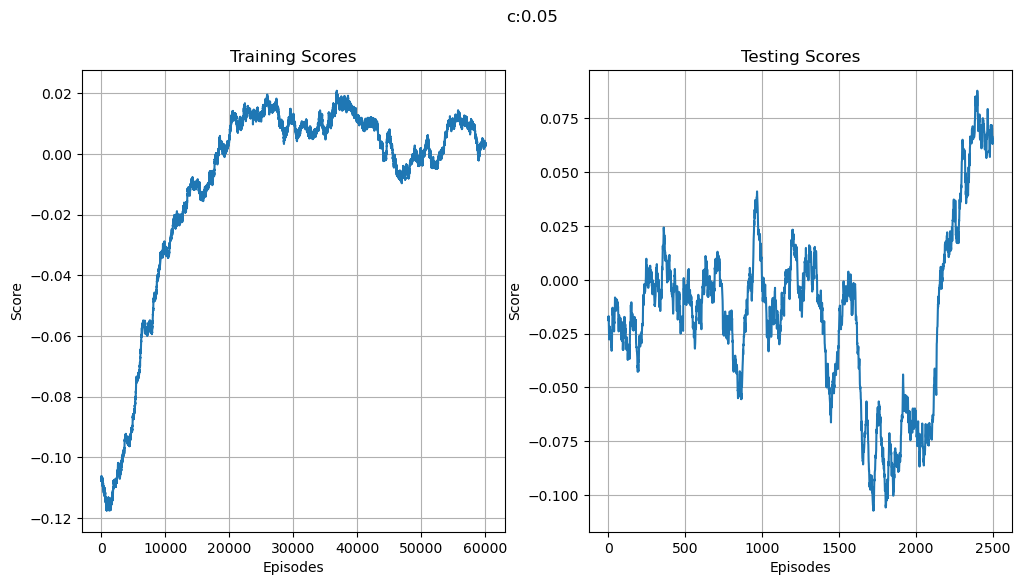

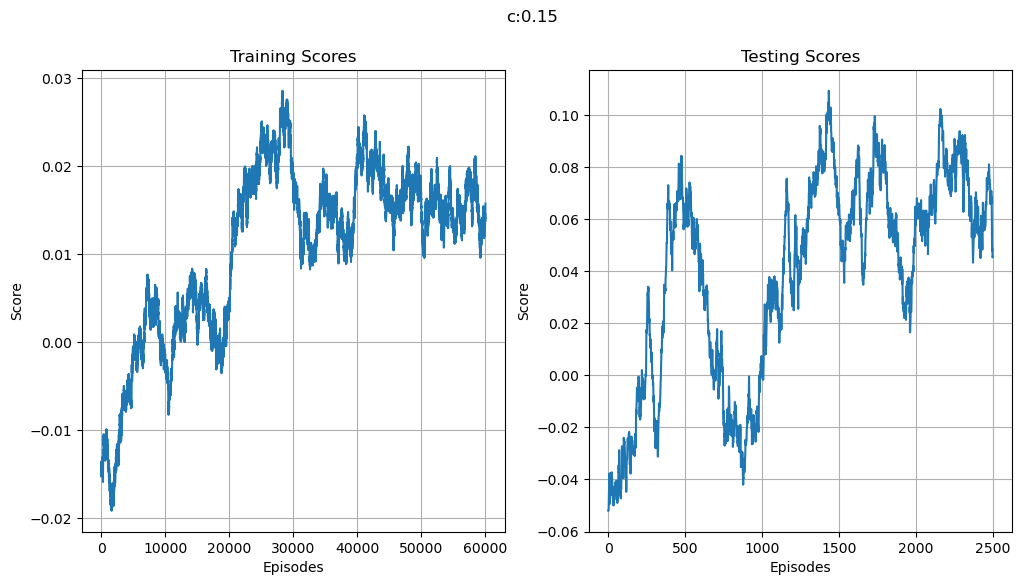

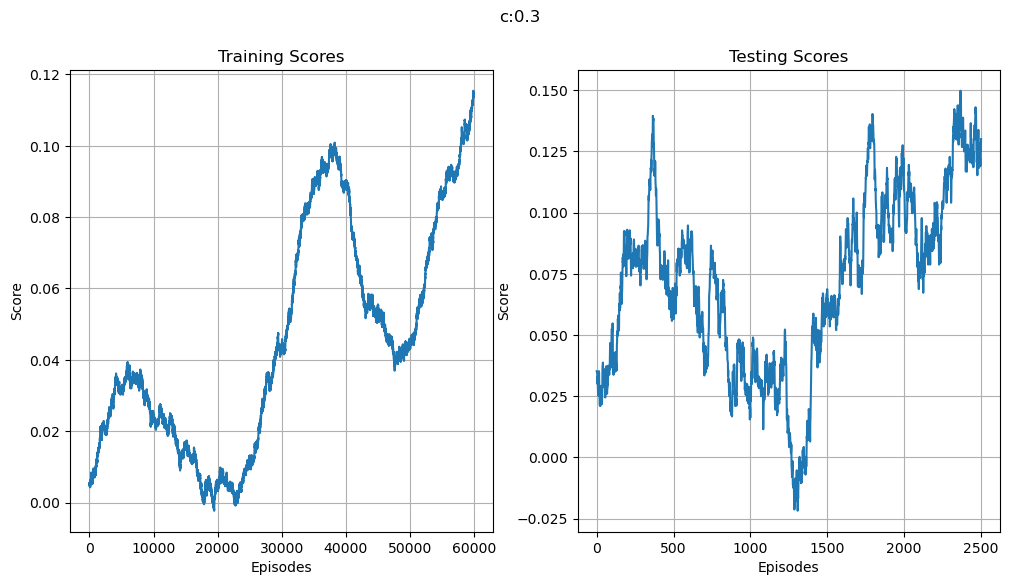

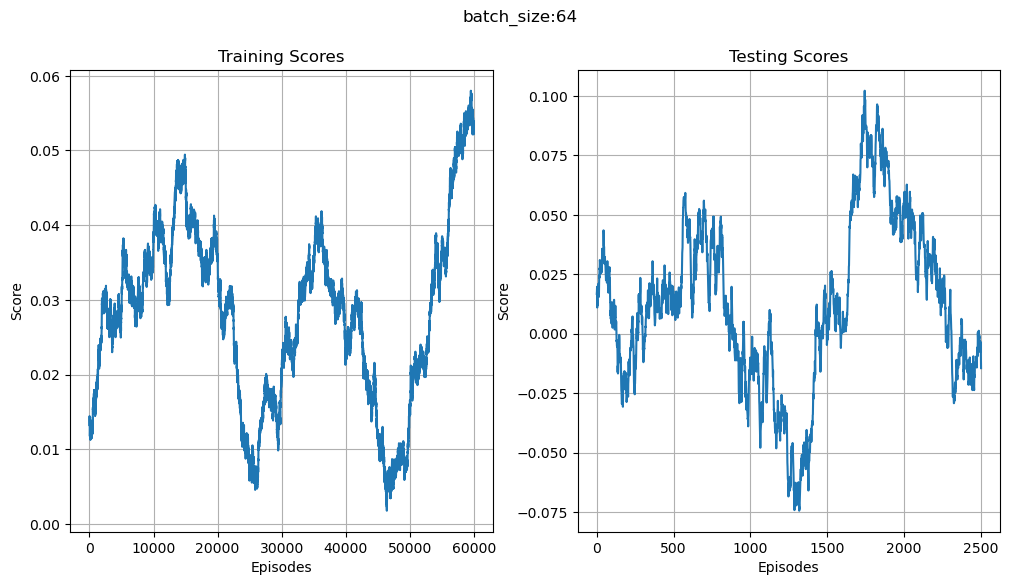

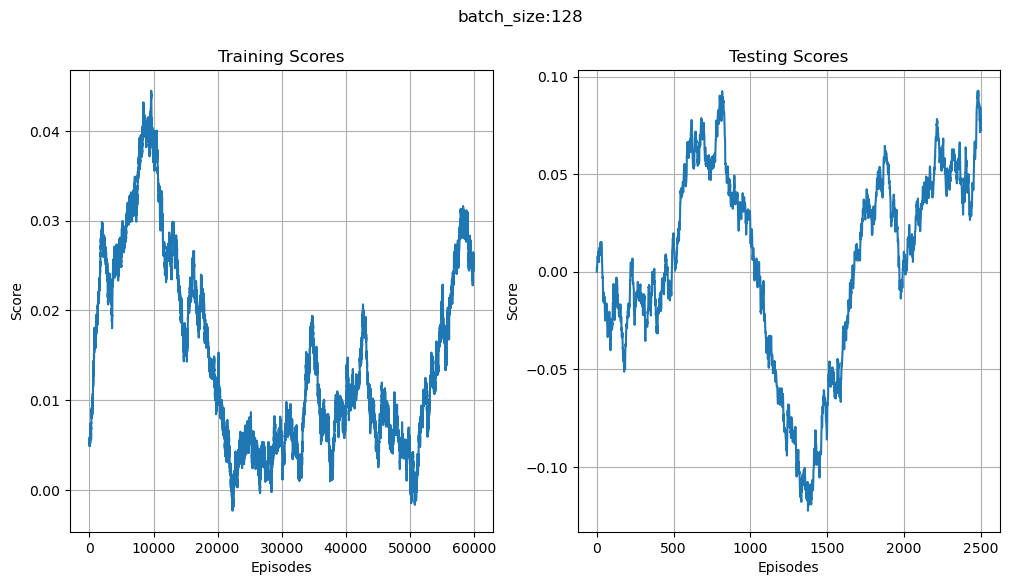

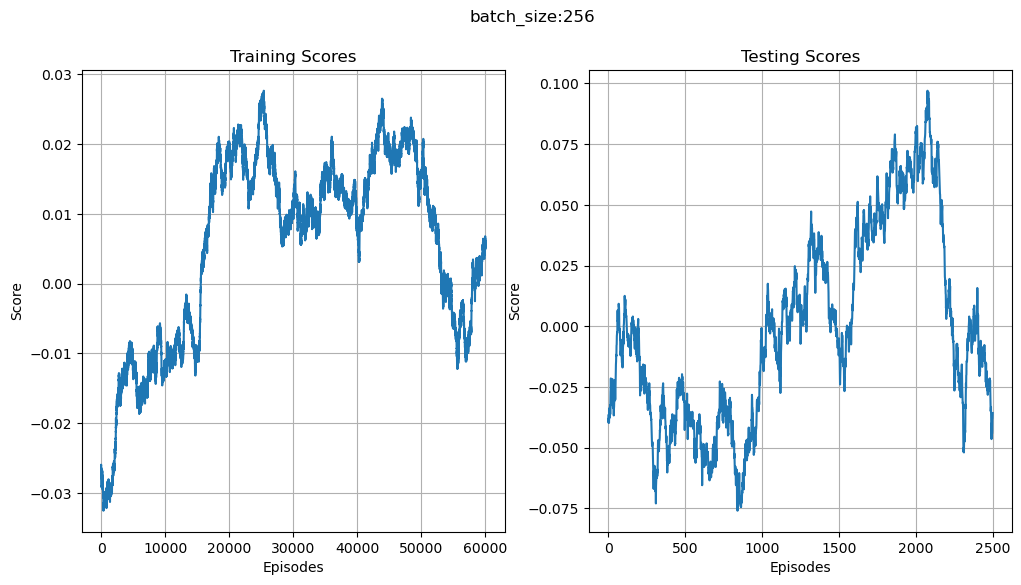

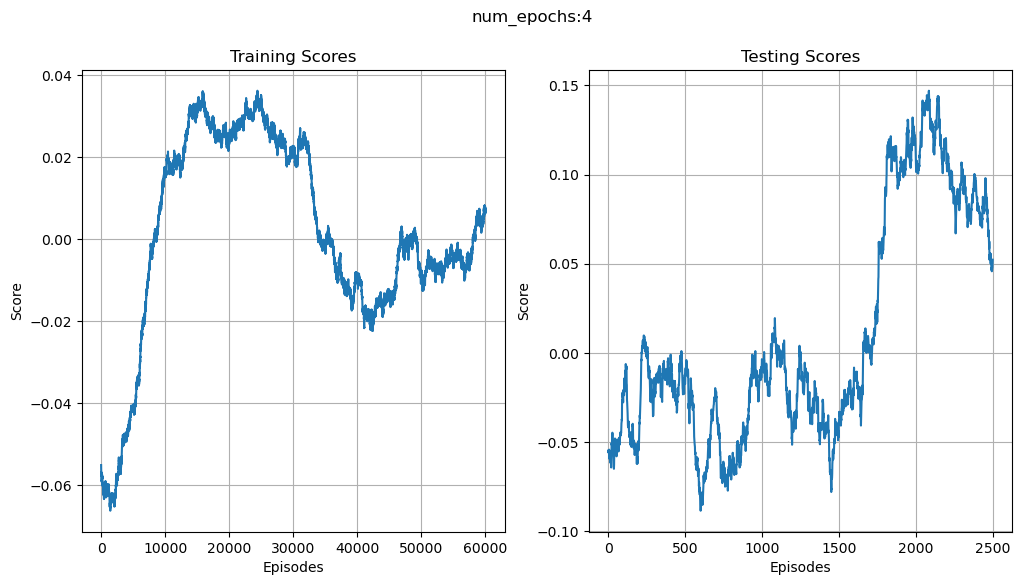

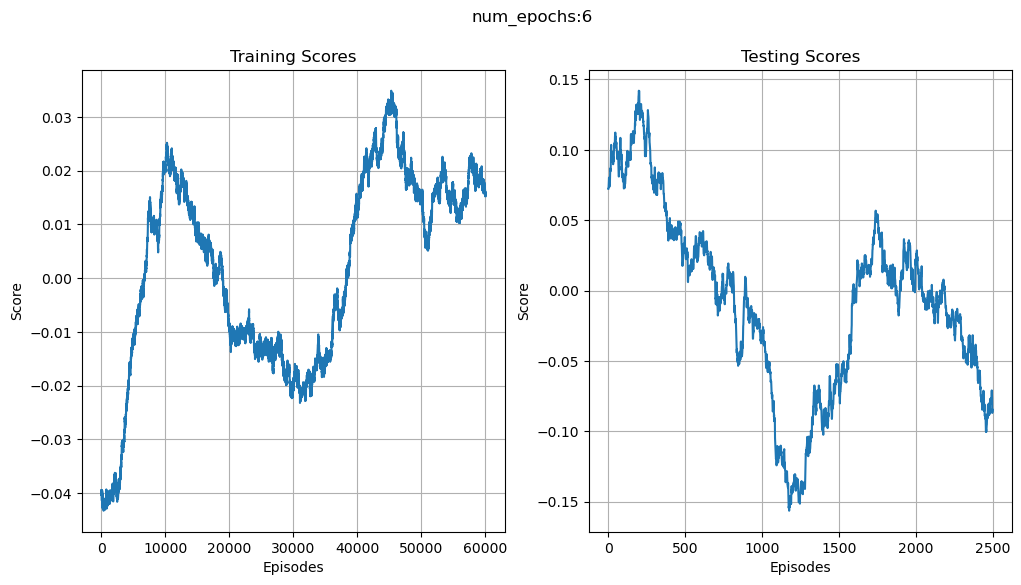

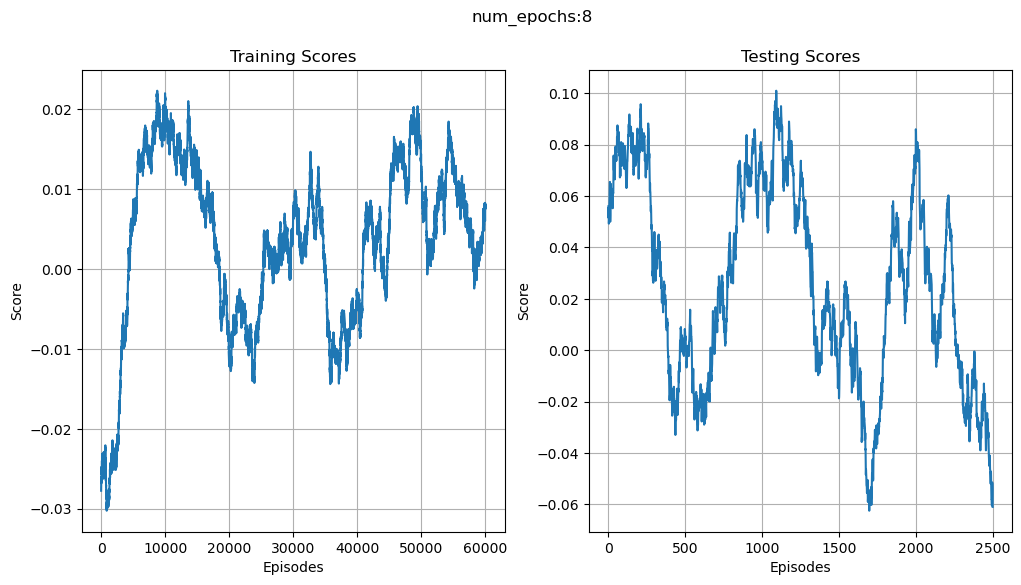

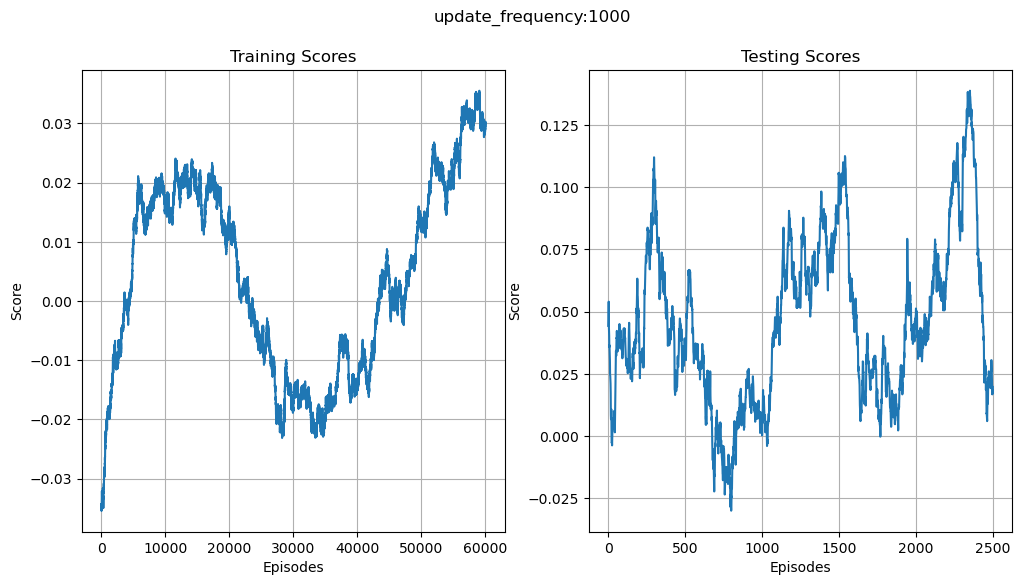

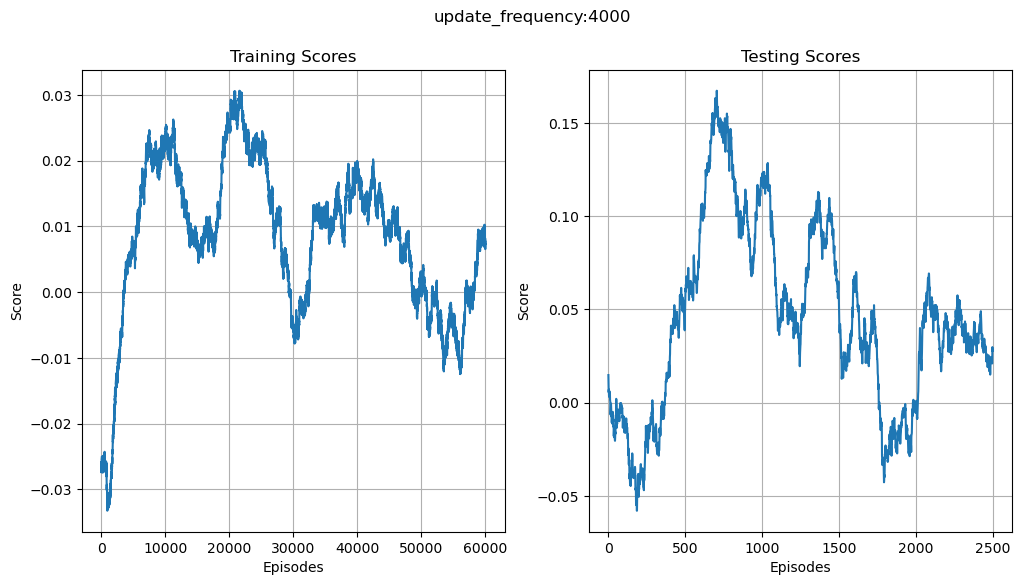

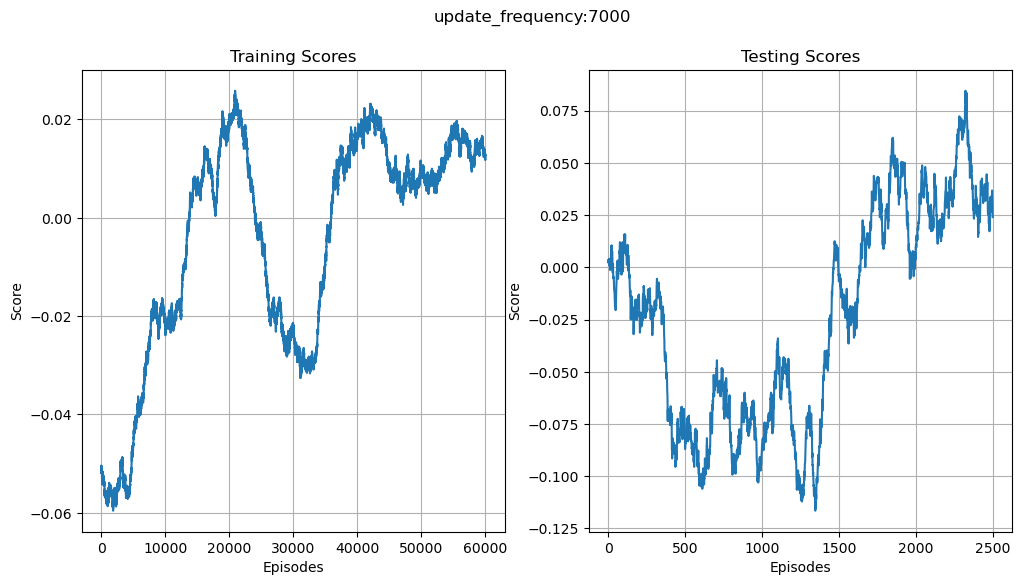

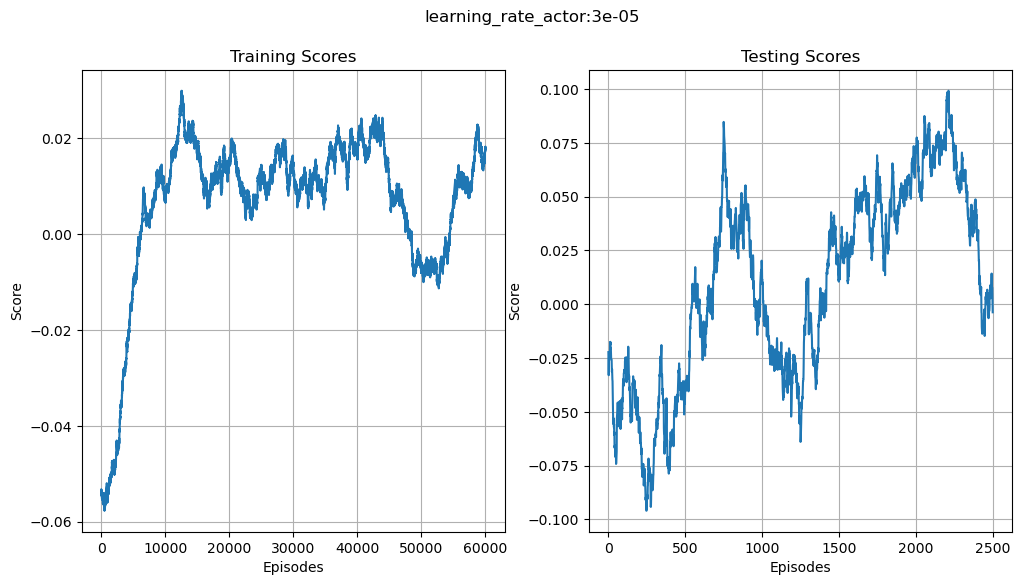

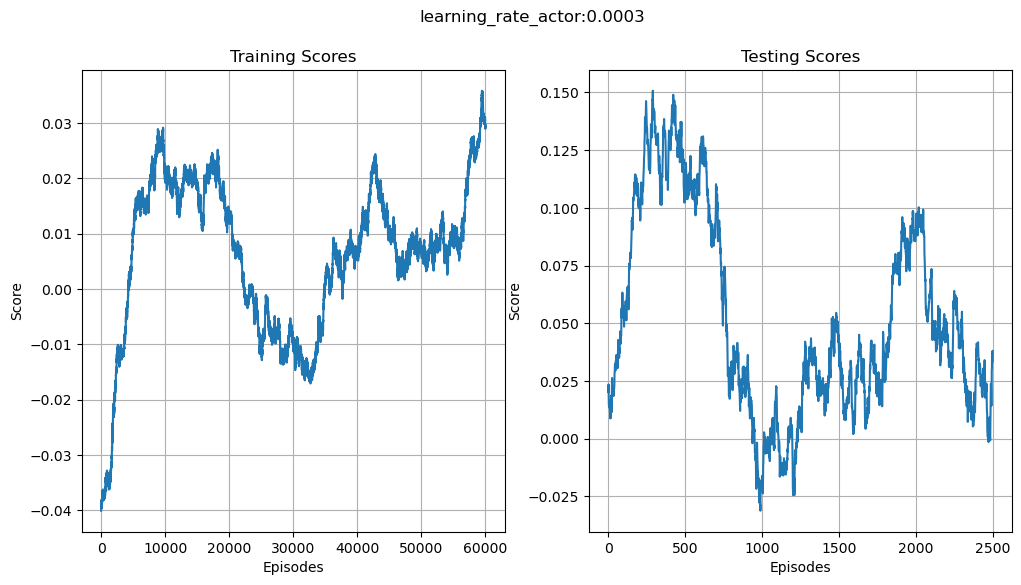

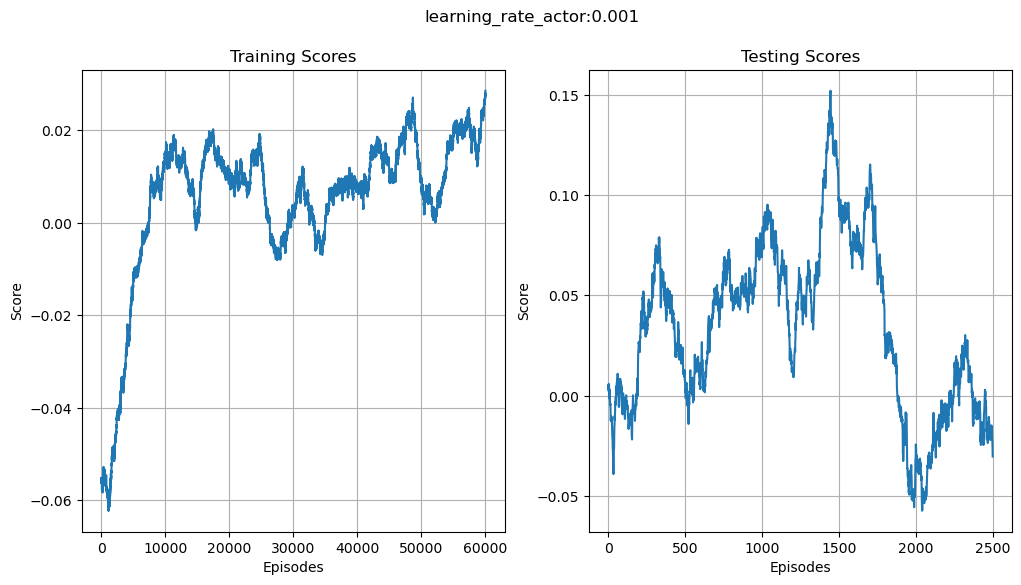

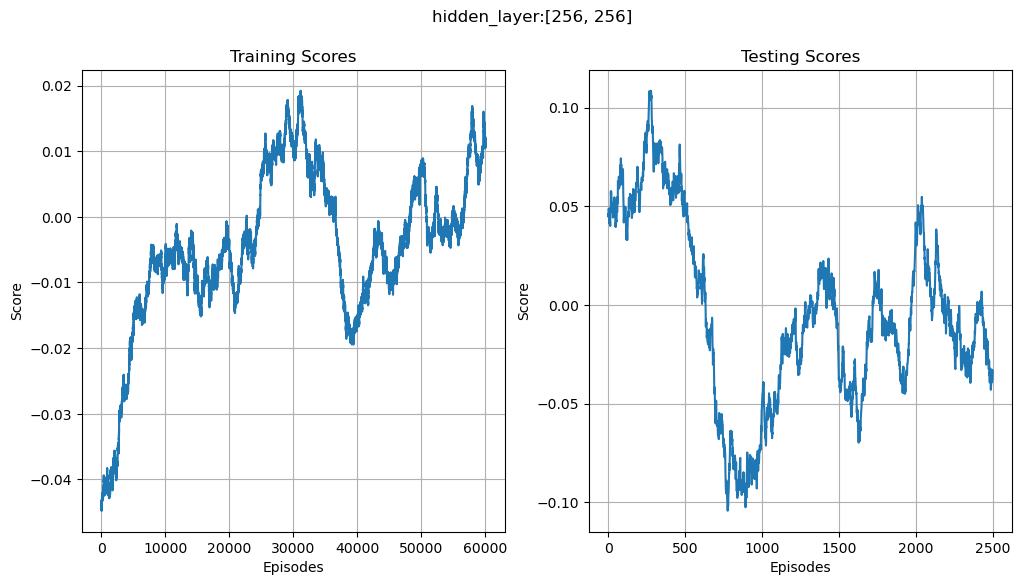

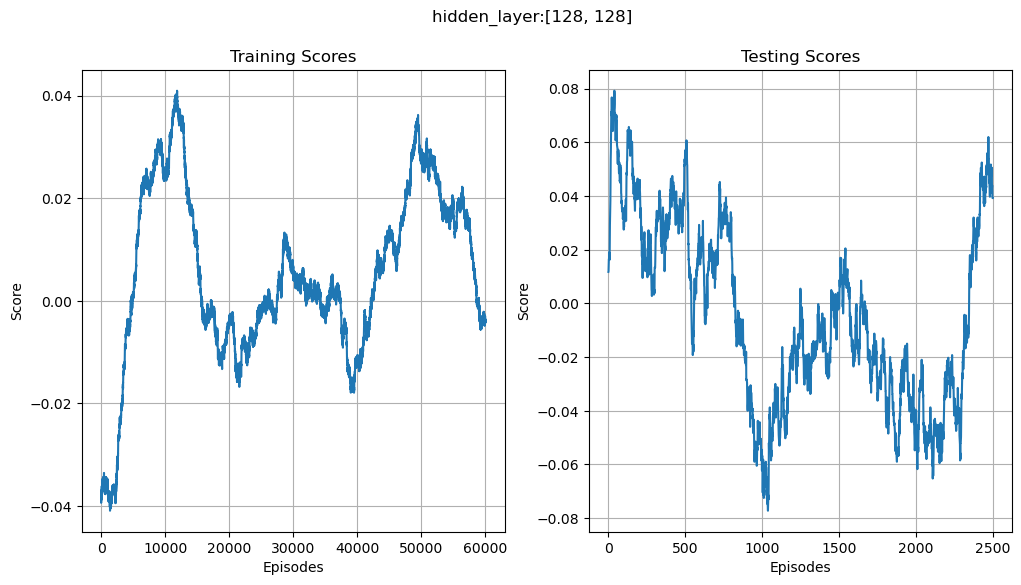

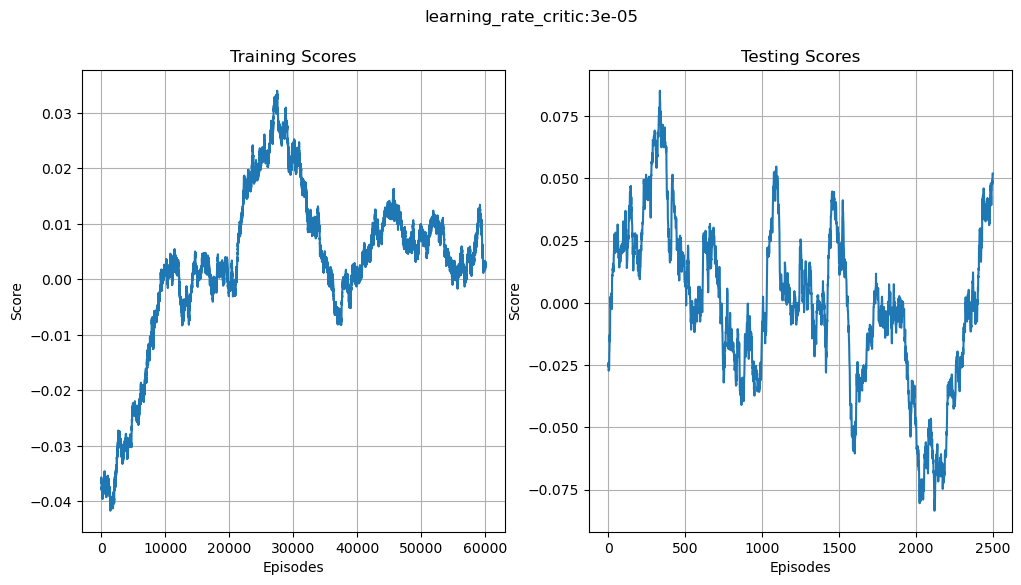

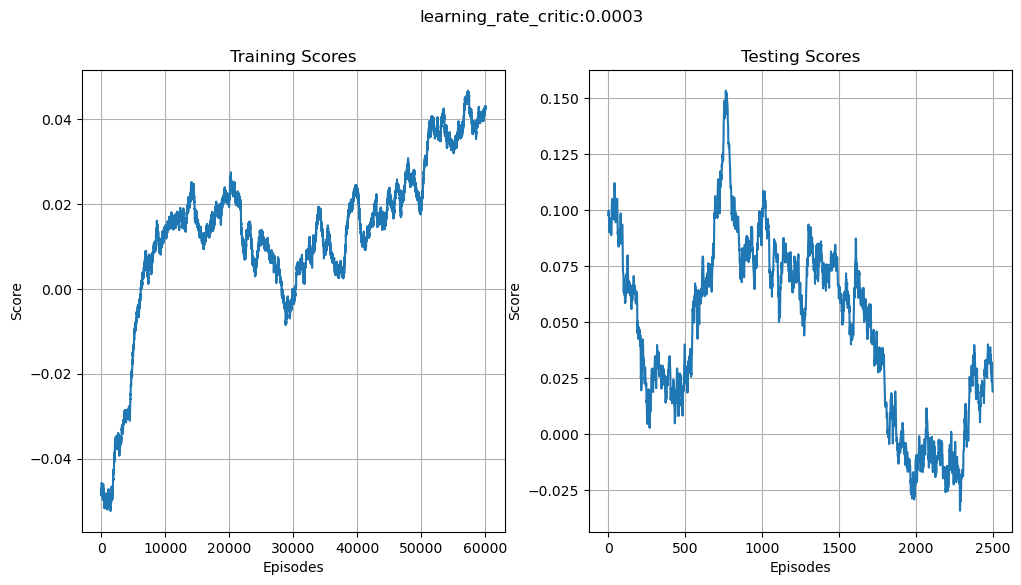

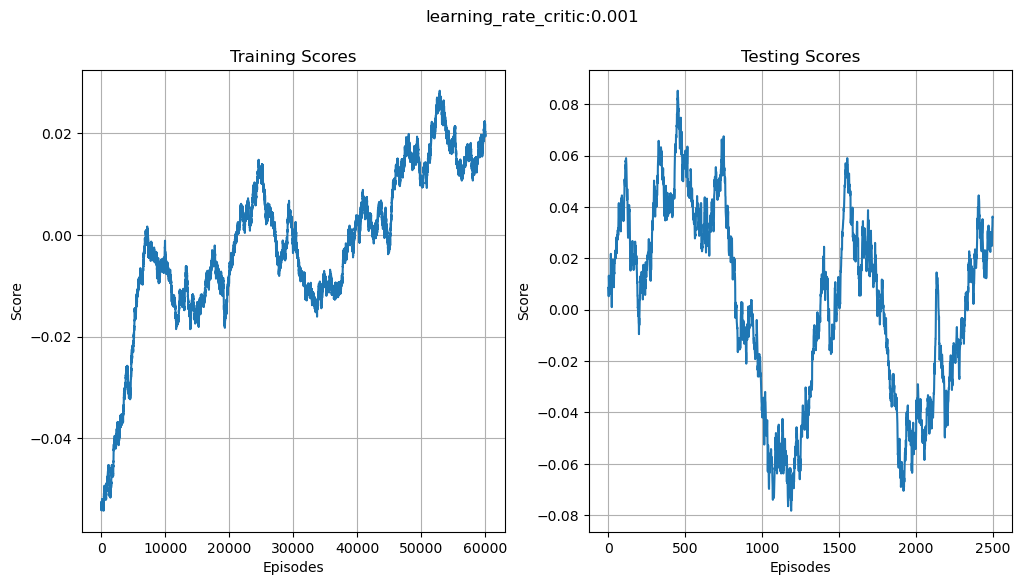

In [120]:
for key in trains_final:
    window = 10000
    rolling = np.convolve(trains_final[key],
                        np.ones(window)/window, mode='valid')
    fig, (ax1, ax2)  = plt.subplots(1, 2, figsize=(12, 6))
    ax1.set_title("Training Scores")
    ax1.set_xlabel("Episodes")
    ax1.set_ylabel("Score")
    ax1.plot(rolling)
    ax1.grid(True)
    window = 500
    rolling = np.convolve(test_final[key],
                        np.ones(window)/window, mode='valid')
    ax2.set_title("Testing Scores")
    ax2.set_xlabel("Episodes")
    ax2.set_ylabel("Score")
    ax2.plot(rolling)
    ax2.grid(True)
    plt.suptitle(key)
    plt.show()

In [ ]:
import matplotlib.pyplot as plt

window = 10000
rolling = np.convolve(train_scores,
                      np.ones(window)/window, mode='valid')
plt.plot(rolling)
plt.axhline(0,color='k',ls='--')
plt.ylabel('BB / hand ({}-hand MA)'.format(window))
plt.xlabel('Hand number')
plt.show()

window = 500
rolling = np.convolve(test_scores,
                      np.ones(window)/window, mode='valid')
plt.plot(rolling)
plt.axhline(0,color='k',ls='--')
plt.ylabel('BB / hand ({}-hand MA)'.format(window))
plt.xlabel('Hand number')
plt.show()


# fig, (ax1, ax2)  = plt.subplots(1, 2)
# ax1.set_title("Training Scores")
# ax1.set_xlabel("Episodes")
# ax1.set_ylabel("Score")
# ax1.plot(train_scores)
# ax1.grid(True)

# ax2.set_title("Testing Scores")
# ax2.set_xlabel("Episodes")
# ax2.set_ylabel("Score")
# ax2.plot(test_scores)
# ax2.grid(True)

# plt.tight_layout()

# plt.show()


TypeError: unsupported operand type(s) for *: 'float' and 'dict'

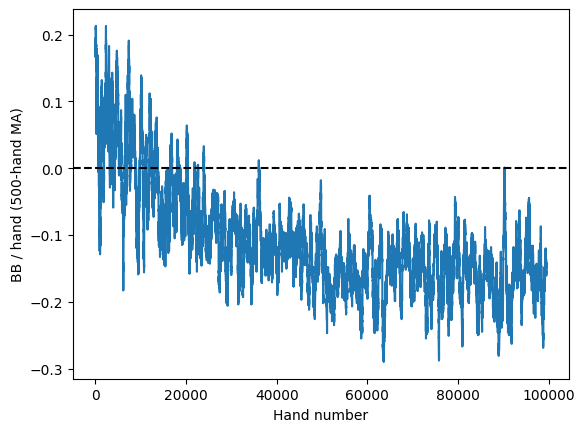

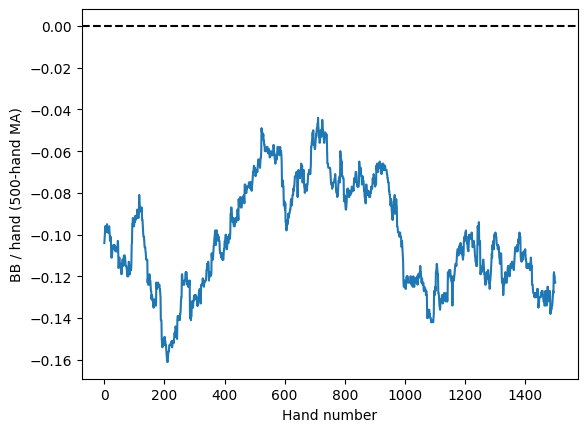

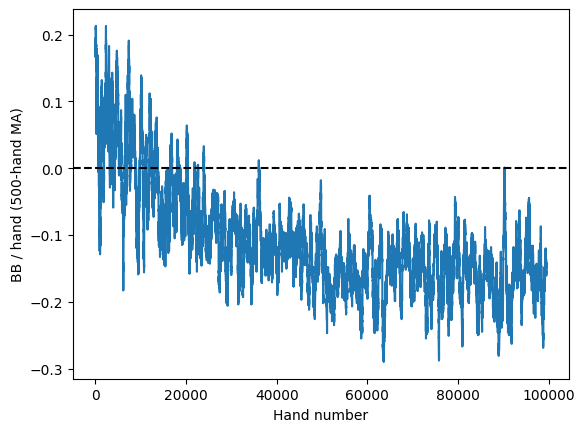

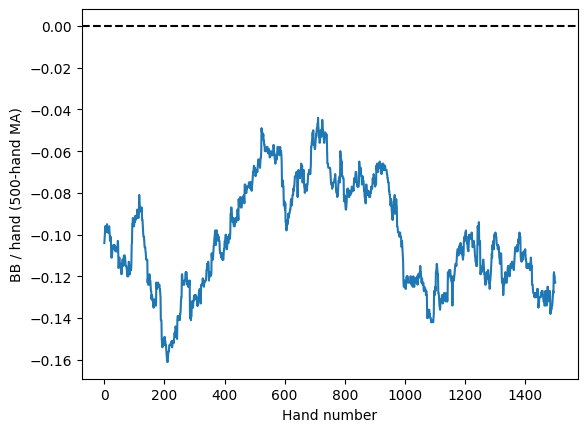

## PPO Example: LunarLander

In [ ]:
ppo_interaction = ppo.PPO_interaction(interaction_config=ppo_interaction_config,
                      actor_configs = actor_configs,
                      critic_configs = critic_configs
                  )

train_scores, trained_agents = ppo_interaction.train()

In [ ]:
test_scores = ppo_interaction.test()

In [ ]:
import matplotlib.pyplot as plt

fig, (ax1, ax2)  = plt.subplots(1, 2)
ax1.set_title("Training Scores")
ax1.set_xlabel("Episodes")
ax1.set_ylabel("Score")
ax1.plot(train_scores)
ax1.grid(True)

ax2.set_title("Testing Scores")
ax2.set_xlabel("Episodes")
ax2.set_ylabel("Score")
ax2.plot(test_scores)
ax2.grid(True)

plt.tight_layout()

plt.show()

